# Case Study: Aaple closing share price from 2004 to 2021!

#### Saiful Islam
#### Date:11/30/2022

In [20]:
pip install pandas-datareader



     ------------------------------------ 109.5/109.5 kB 703.7 kB/s eta 0:00:00


In [2]:
from pandas_datareader import data
goog=data.DataReader?

In [20]:
from pandas_datareader import data
aapl=data.DataReader('AAPL',start='2004',end='2021',data_source='yahoo')
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-31,0.384464,0.378214,0.381250,0.381607,174451200.0,0.325289
2004-01-02,0.388393,0.378214,0.384821,0.380000,144642400.0,0.323919
2004-01-05,0.399821,0.382500,0.382500,0.395893,395018400.0,0.337466
2004-01-06,0.400357,0.387679,0.397321,0.394464,509348000.0,0.336248
2004-01-07,0.407679,0.391607,0.394643,0.403393,586874400.0,0.343859


In [21]:
aapl=aapl['Close']
aapl.head()

Date
2003-12-31    0.381607
2004-01-02    0.380000
2004-01-05    0.395893
2004-01-06    0.394464
2004-01-07    0.403393
Name: Close, dtype: float64

In [22]:
aapl.tail()

Date
2020-12-24    131.970001
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

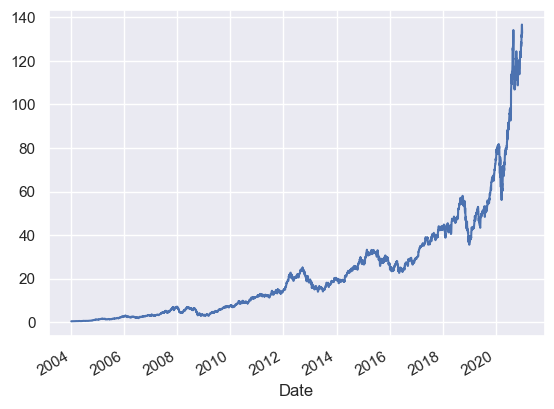

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
aapl.plot()

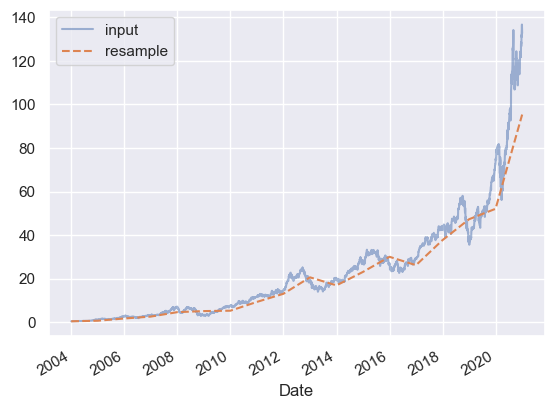

In [31]:
aapl.plot(alpha=0.5,style='-')
aapl.resample('BA').mean().plot(style='--')
plt.legend(['input','resample','asfreq'],loc='upper left');

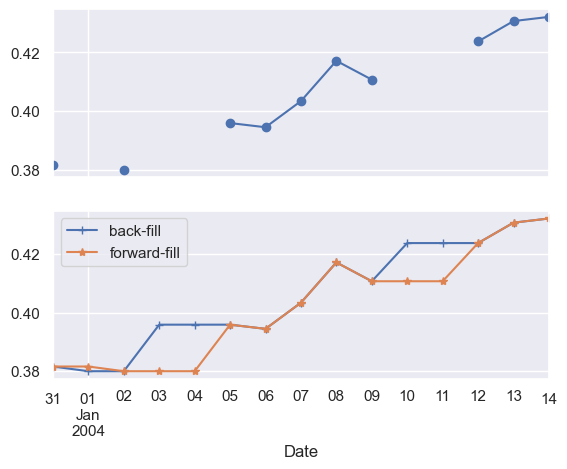

In [49]:
fig,ax=plt.subplots(2,sharex=True)
data=aapl.iloc[:10]
data.asfreq('D').plot(ax=ax[0],marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1],marker='+')
data.asfreq('D',method='ffill').plot(ax=ax[1], marker='*')
ax[1].legend(["back-fill","forward-fill"])

C:\Users\88019\AppData\Local\Temp\ipykernel_14828\2408602403.py:6: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  aapl.tshift(900).plot(ax=ax[2])


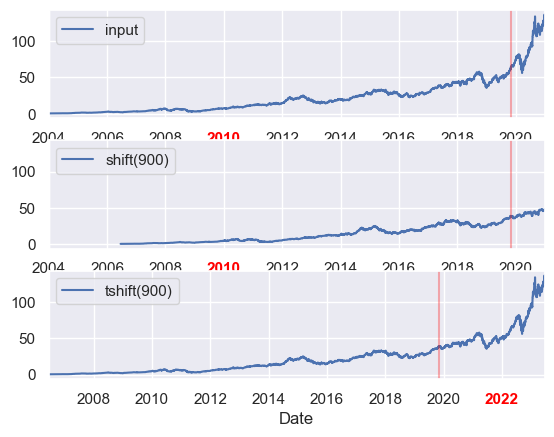

In [94]:
import pandas as pd
fig,ax=plt.subplots(3,sharey=True)
aapl=aapl.asfreq('D',method='pad')
aapl.plot(ax=ax[0])
aapl.shift(900).plot(ax=ax[1])
aapl.tshift(900).plot(ax=ax[2])
local_max=pd.to_datetime('2019-11-05')
offset=pd.Timedelta(900,'D')
ax[0].legend(['input'],loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy',color='red')
ax[0].axvline(local_max,alpha=0.3,color='red')

ax[1].legend(['shift(900)'],loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy',color='red')
ax[1].axvline(local_max,alpha=0.3,color='red')

ax[2].legend(['tshift(900)'],loc=2)
ax[2].get_xticklabels()[-2].set(weight='heavy',color='red')
ax[2].axvline(local_max,alpha=0.3,color='red')

In [93]:
for label in ax[0].get_xticklabels():
    print(label)
    

Text(12417, 0, '')
Text(12418, 0, '2004')
Text(13149, 0, '2006')
Text(13879, 0, '2008')
Text(14610, 0, '2010')
Text(15340, 0, '2012')
Text(16071, 0, '2014')
Text(16801, 0, '2016')
Text(17532, 0, '2018')
Text(18262, 0, '2020')
Text(18627, 0, '')
